# Pooling Layer

## Pooling Layerをスクラッチ実装

In [1]:
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torch import optim
from torch.nn import functional as F
import time
%load_ext autoreload
%autoreload 2
import utils

In [2]:
dataset = torchvision.datasets.MNIST(root = './mnist_data', train = True, download = True)
im, label = dataset[0]
im = transforms.ToTensor()(im)[0, :, :]

In [3]:
im.shape

torch.Size([28, 28])

In [4]:
def max_pooling(X, kernel_size=2, stride=2):
    X_h, X_w = X.shape
    output_data = []

    for i in range(0, X_h - kernel_size + 1, stride):
        row = []
        for j in range(0, X_w - kernel_size + 1, stride):
            row.append(X[i:i+kernel_size, j:j+kernel_size].max().item())
        output_data.append(row)
    return torch.tensor(output_data)

In [5]:
result = max_pooling(im, 2, 2)

In [6]:
result.shape

torch.Size([14, 14])

In [7]:
result

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0706, 0.0706, 0.5333,
         0.6863, 1.0000, 0.9686, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.1922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922,
         0.8824, 0.9922, 0.7647, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0706, 0.9922, 0.9922, 0.9922, 0.7765, 0.9686,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6039, 0.9922, 0.0078, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.9922, 0.8824, 0.4235,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3176, 0.9922, 0.9922,
  

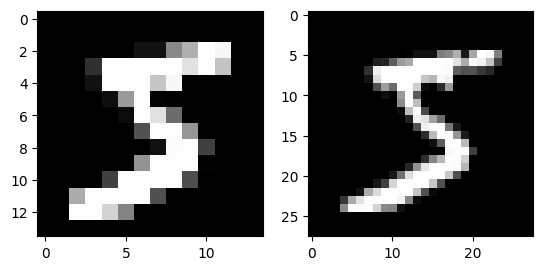

In [8]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(result, cmap = 'gray')
axes[1].imshow(im, cmap = 'gray')

In [70]:
upper_edge_filter = torch.tensor([[-1., -1., -1.],
                                 [0., 0., 0.],
                                 [1., 1., 1.]])
def convolution(im, filter):
    feature_map = torch.zeros((im.shape[0] - filter.shape[0]-1, im.shape[1] - filter.shape[1]-1))
    for n in range(im.shape[0] - filter.shape[0]-1):
        for i in range(im.shape[1] - filter.shape[1]-1):
            feature_map[n, i] = torch.sum(im[n:n+filter.shape[0], i:i+filter.shape[1]] @ filter)
    return feature_map

def relu(X):
    return torch.clamp(X, min = 0)

feature_map = convolution(im, upper_edge_filter)
feature_map = relu(feature_map)

In [71]:
output = max_pooling(feature_map)

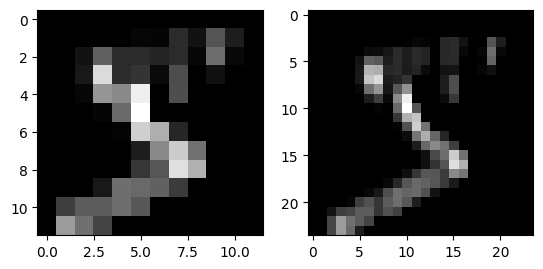

In [74]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(output, cmap = 'gray')
axes[1].imshow(feature_map, cmap = 'gray')

## PytorchのMax Pooling Layer

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = True, download = True, transform = transform)
val_dataset = torchvision.datasets.MNIST(root = './mnist_data', train = False, download = True, transform = transform)
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 4)
val_loader = DataLoader(val_dataset, batch_size = 128, num_workers = 4)

In [32]:
conv_model = nn.Sequential(
    # 1×28×28
    nn.Conv2d(1, 4, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # 4×14×14
    nn.Conv2d(4, 8, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # 8×7×7
    nn.Conv2d(8, 16, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # 16×3×3
    nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # 32×1×1
    nn.Conv2d(32, 10, kernel_size = 3, stride = 1, padding = 1),
    # 10×1×1
    nn.Flatten()
    # 10
)

class ConvModel(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, 4, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv5 = nn.Conv2d(32, 10, kernel_size = 3, stride = 1, padding = 1)
        self.flatten = nn.Flatten()

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2)
        X = F.relu(self.conv5(X))
        X = self.flatten(X)
        return X

In [33]:
X, y = next(iter(train_loader))

In [34]:
X.shape

torch.Size([128, 1, 28, 28])

In [28]:
preds = conv_model(X)

In [29]:
preds.shape

torch.Size([128, 10])

In [35]:
conv_model2 = ConvModel(in_ch = 1)

In [36]:
preds = conv_model2(X)

In [37]:
preds

tensor([[0.0000, 0.0000, 0.0244,  ..., 0.0127, 0.0181, 0.0700],
        [0.0000, 0.0000, 0.0238,  ..., 0.0124, 0.0213, 0.0689],
        [0.0000, 0.0000, 0.0286,  ..., 0.0122, 0.0203, 0.0733],
        ...,
        [0.0000, 0.0000, 0.0253,  ..., 0.0127, 0.0190, 0.0672],
        [0.0000, 0.0000, 0.0286,  ..., 0.0147, 0.0164, 0.0691],
        [0.0000, 0.0000, 0.0229,  ..., 0.0153, 0.0209, 0.0657]],
       grad_fn=<ViewBackward0>)